# ***GRIP INTERNSHIP***

**Name:** PRIYADHARSHINI RAMESH

**Task:** 7

**Title:** Stock Market Prediction using Numerical and Textual Analysis

***Importing the libraries:***

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

**Load the data files:**

In [4]:
headlines = pd.read_csv('india-news-headlines.csv')
price = pd.read_csv('/content/merged_data.csv')

***Data Preprocessing:***

In [5]:
price.shape

(108945, 8)

In [6]:
price

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2019-02-08,48.599998,48.930000,48.470001,48.910000,46.454433,906700,NVO
1,2019-02-11,48.680000,48.810001,48.419998,48.660000,46.216980,1001200,NVO
2,2019-02-12,48.990002,49.480000,48.830002,49.400002,46.919834,868600,NVO
3,2019-02-13,49.040001,49.279999,49.020000,49.090000,46.625393,868900,NVO
4,2019-02-14,49.750000,49.910000,49.560001,49.779999,47.280754,2015900,NVO
...,...,...,...,...,...,...,...,...
108940,2022-02-02,15.300000,15.300000,13.760000,13.870000,13.870000,65500,ANVS
108941,2022-02-03,13.500000,14.000000,13.310000,13.640000,13.640000,39500,ANVS
108942,2022-02-04,13.620000,14.920000,13.530000,14.720000,14.720000,50700,ANVS
108943,2022-02-07,14.590000,16.160000,14.470000,14.960000,14.960000,74000,ANVS


In [7]:
price.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

In [8]:
price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,108945.000000,108945.000000,108945.000000,108945.000000,108945.000000,1.089450e+05
mean,45.370765,46.472301,44.222670,45.332287,45.300636,7.786527e+05
std,65.105505,66.168111,63.985977,65.104704,65.074106,2.516812e+06
min,0.752000,0.850000,0.700000,0.750000,0.750000,0.000000e+00
25%,14.380000,14.850000,13.880000,14.330000,14.300000,1.378000e+05
50%,24.719999,25.540001,23.920000,24.690001,24.690001,3.438000e+05
75%,46.700001,48.040001,45.290001,46.660000,46.589153,7.761000e+05
max,683.500000,686.619995,674.570007,680.960022,680.960022,2.246410e+08


In [9]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108945 entries, 0 to 108944
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       108945 non-null  object 
 1   Open       108945 non-null  float64
 2   High       108945 non-null  float64
 3   Low        108945 non-null  float64
 4   Close      108945 non-null  float64
 5   Adj Close  108945 non-null  float64
 6   Volume     108945 non-null  int64  
 7   Symbol     108945 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 6.6+ MB


In [18]:
headlines

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
68817,20020130,bangalore-times,BCC revises road digging protocol
68818,20020130,business.india-business,IOC to set up 11 LPG auto outlets in Rajasthan
68819,20020130,city.lucknow,BJP has done the most for SCs; STs: Kovind
68820,20020130,city.delhi,Manu's plea against daily trial rejected


In [19]:
headlines.shape

(68822, 3)

In [20]:
headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68822 entries, 0 to 68821
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   publish_date       68822 non-null  int64 
 1   headline_category  68821 non-null  object
 2   headline_text      68821 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [21]:
headlines.describe()

,publish_date
count,6.882200e+04
mean,2.001218e+07
std,7.628716e+04
min,2.002000e+04
25%,2.001082e+07
50%,2.001100e+07
75%,2.001121e+07
max,2.002013e+07


In [24]:
headlines.isnull().sum()

publish_date         0
headline_category    1
headline_text        1
dtype: int64

In [17]:
headlines.duplicated().sum()

1028

In [23]:
headlines = headlines.drop_duplicates()
headlines

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
68817,20020130,bangalore-times,BCC revises road digging protocol
68818,20020130,business.india-business,IOC to set up 11 LPG auto outlets in Rajasthan
68819,20020130,city.lucknow,BJP has done the most for SCs; STs: Kovind
68820,20020130,city.delhi,Manu's plea against daily trial rejected


***Split the data into Test and Train Data:***

In [60]:
use_data_size = len(price) - 1
train_data_size = int(0.8 * use_data_size)
total_data_size = len(price)
start_point = total_data_size - use_data_size
print("Length of Training Set is ",train_data_size)
print('Length of Testing Set is ', total_data_size - train_data_size)

Length of Training Set is  87155
Length of Testing Set is  21790


***Create a new columns for a dataset:***

In [63]:
close_price = price.iloc[start_point:total_data_size,3]
compound = price.iloc[start_point:total_data_size,3]
open_price = price.iloc[start_point:total_data_size,0]
high = price.iloc[start_point:total_data_size,1]
low = price.iloc[start_point:total_data_size,2]
volume = price.iloc[start_point:total_data_size,5]

In [64]:
close_price_shifted = close_price.shift(-1)
compound_shifted = compound.shift(-1)

***Create a new DataFrame:***

In [65]:
stock_price = pd.DataFrame({
    'close':close_price,
    'close_price_shifted':close_price_shifted,
    'compound':compound,
    'compound_shifted':compound_shifted,
    'open':open_price,
    'high':high,
    'low':low,
    'volume':volume
})

In [66]:
stock_price

,close,close_price_shifted,compound,compound_shifted,open,high,low,volume
Date,,,,,,,,
2019-02-11,48.660000,49.400002,48.660000,49.400002,48.680000,48.810001,48.419998,1001200
2019-02-12,49.400002,49.090000,49.400002,49.090000,48.990002,49.480000,48.830002,868600
2019-02-13,49.090000,49.779999,49.090000,49.779999,49.040001,49.279999,49.020000,868900
2019-02-14,49.779999,50.349998,49.779999,50.349998,49.750000,49.910000,49.560001,2015900
2019-02-15,50.349998,50.320000,50.349998,50.320000,49.810001,50.369999,49.639999,2201300
...,...,...,...,...,...,...,...,...
2022-02-02,13.870000,13.640000,13.870000,13.640000,15.300000,15.300000,13.760000,65500
2022-02-03,13.640000,14.720000,13.640000,14.720000,13.500000,14.000000,13.310000,39500
2022-02-04,14.720000,14.960000,14.720000,14.960000,13.620000,14.920000,13.530000,50700


***Data Preprocessing for new dataset:***

In [68]:
stock_price.isnull().sum()

close                  0
close_price_shifted    1
compound               0
compound_shifted       1
open                   0
high                   0
low                    0
volume                 0
dtype: int64

In [69]:
stock_price.dropna(axis=0,inplace=True)

In [70]:
y = stock_price['close_price_shifted']
y.shape

(108943,)

In [71]:
x = stock_price.drop(['close_price_shifted'],axis=1)
x.head()

,close,compound,compound_shifted,open,high,low,volume
Date,,,,,,,
2019-02-11,48.660000,48.660000,49.400002,48.680000,48.810001,48.419998,1001200
2019-02-12,49.400002,49.400002,49.090000,48.990002,49.480000,48.830002,868600
2019-02-13,49.090000,49.090000,49.779999,49.040001,49.279999,49.020000,868900
2019-02-14,49.779999,49.779999,50.349998,49.750000,49.910000,49.560001,2015900
2019-02-15,50.349998,50.349998,50.320000,49.810001,50.369999,49.639999,2201300


***Reshape the data:***

In [72]:
scaler = MinMaxScaler(feature_range=(-1,1))
y = scaler.fit_transform(np.array(y).reshape(-1,1))
x = scaler.fit_transform(x)

***Test and Train set for new dataset:***

In [74]:
train_x = x[:train_data_size,]
test_x = x[train_data_size + 1: len(x)]
train_y = y[:train_data_size,]
test_y = y[train_data_size + 1 : len(y)]

In [75]:
train_x = train_x.reshape(-1,7,1)
test_x = test_x.reshape(-1,7,1)

**CREATING A MODEL:**

In [85]:
model = Sequential()
model.add(LSTM(100, return_sequences=True,input_shape= train_x.shape[1:]))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')

In [86]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 7, 100)            40800     
                                                                 
 dropout_12 (Dropout)        (None, 7, 100)            0         
                                                                 
 lstm_13 (LSTM)              (None, 7, 100)            80400     
                                                                 
 dropout_13 (Dropout)        (None, 7, 100)            0         
                                                                 
 lstm_14 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_14 (Dropout)        (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [87]:
history = model.fit(train_x, train_y, validation_data=(test_x,test_y), epochs=20, batch_size=10)

Epoch 1/20
8716/8716 [==============================] - 204s 23ms/step - loss: 0.0034 - val_loss: 1.0422e-04
Epoch 2/20
8716/8716 [==============================] - 176s 20ms/step - loss: 0.0011 - val_loss: 1.0269e-04
Epoch 3/20
8716/8716 [==============================] - 169s 19ms/step - loss: 7.8507e-04 - val_loss: 1.6807e-04
Epoch 4/20
8716/8716 [==============================] - 172s 20ms/step - loss: 6.7051e-04 - val_loss: 9.6309e-05
Epoch 5/20
8716/8716 [==============================] - 171s 20ms/step - loss: 5.9135e-04 - val_loss: 2.6963e-05
Epoch 6/20
8716/8716 [==============================] - 170s 20ms/step - loss: 5.2659e-04 - val_loss: 2.4853e-04
Epoch 7/20
8716/8716 [==============================] - 169s 19ms/step - loss: 4.7695e-04 - val_loss: 7.1979e-05
Epoch 8/20
8716/8716 [==============================] - 170s 20ms/step - loss: 4.2635e-04 - val_loss: 4.2717e-05
Epoch 9/20
8716/8716 [==============================] - 175s 20ms/step - loss: 4.0900e-04 - val_loss: 3.

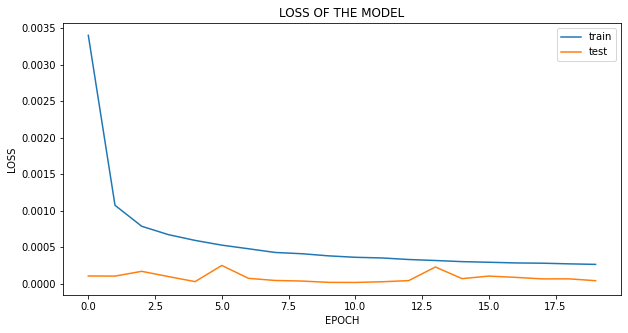

In [90]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LOSS OF THE MODEL')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'])
plt.show()